# Inferences, Comparision, Visualization

## Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Get data

In [2]:
companies_returns = pd.read_csv('./COMPANIES_BASELINES.csv')
backtests_returns = pd.read_csv('./BACKTESTS_BASELINES.csv')


## Visualize company returns

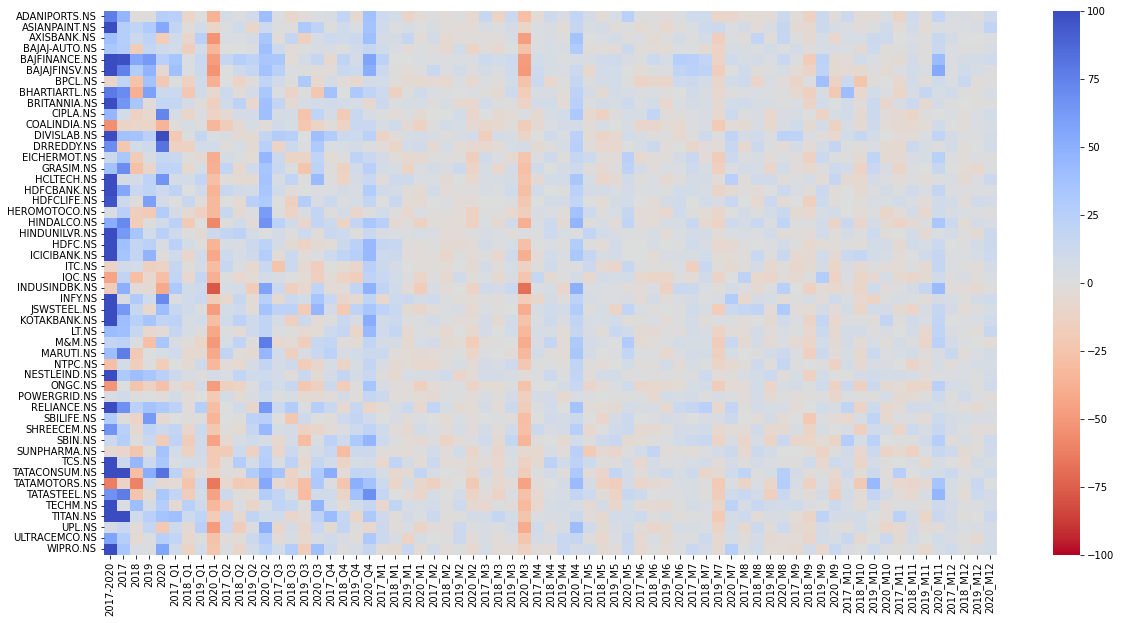

In [3]:
fig = plt.figure(figsize=(20, 10))
y_axis_labels = companies_returns['ticker']
r = sns.heatmap(companies_returns.drop(['ticker'], axis='columns'), cmap='coolwarm_r', yticklabels=y_axis_labels, vmin=-100, vmax=100)

## Visualize backtest returns

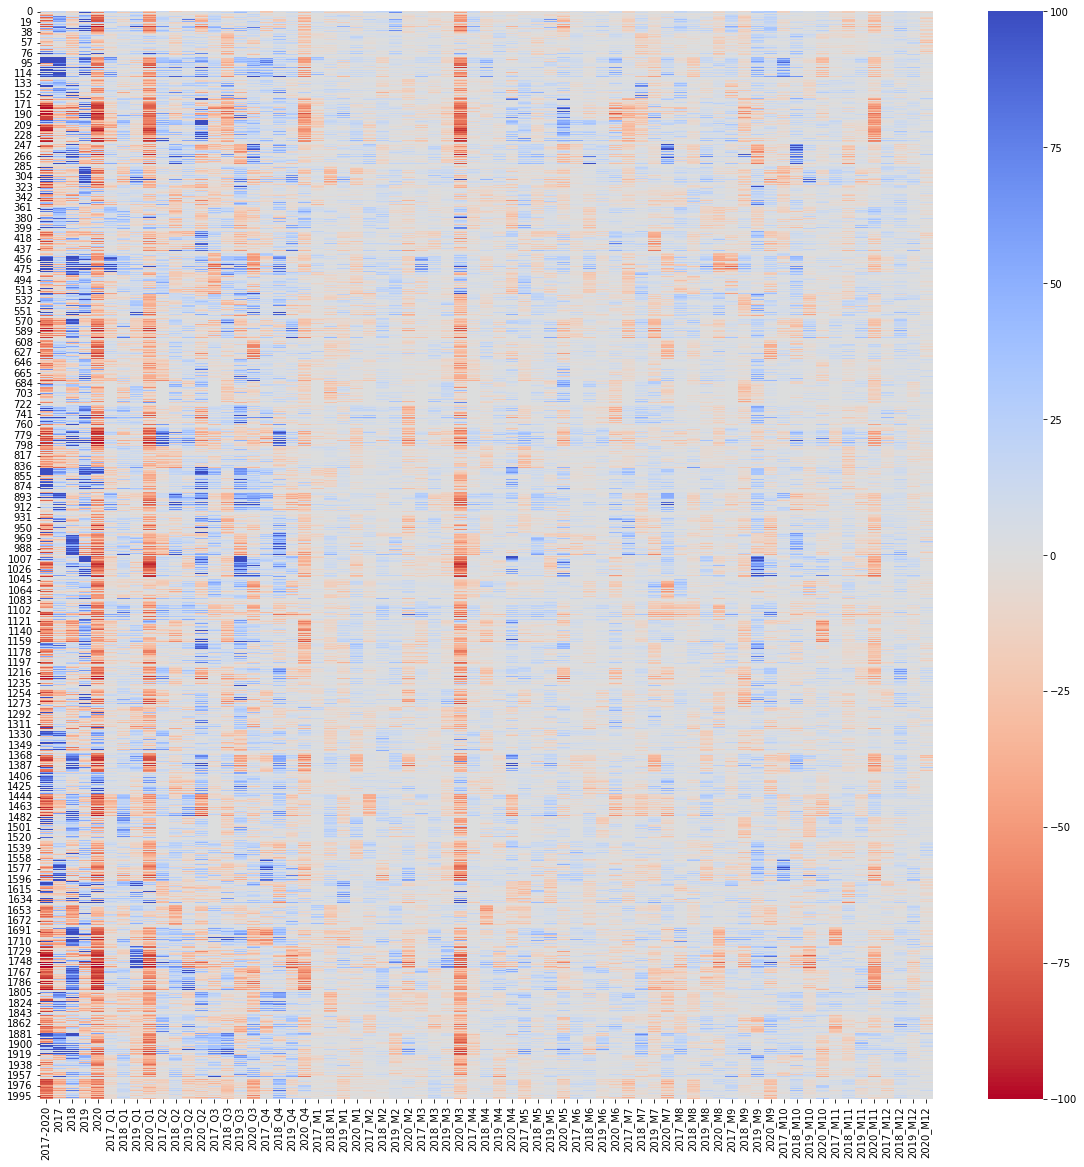

In [4]:
backtests_returns.head()
fig = plt.figure(figsize=(20, 20))
# y_axis_labels = backtests_returns['ticker']
r = sns.heatmap(backtests_returns.drop(['ticker', 'backtest_id'], axis='columns'), cmap='coolwarm_r', vmin=-100, vmax=100)


## Visualization for a single company

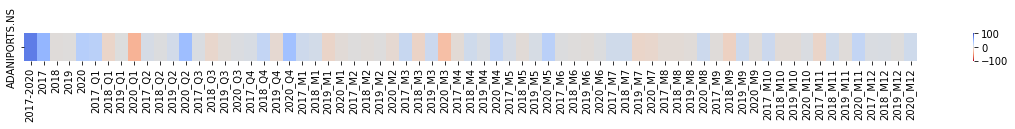

In [5]:
# Company returns
company_ticker = 'ADANIPORTS.NS'
fig = plt.figure(figsize=(20, 0.5))
y_axis_labels = [company_ticker]
r = sns.heatmap(
	companies_returns[companies_returns['ticker'] == company_ticker].drop(['ticker'], axis='columns'),  
	cmap='coolwarm_r',
	yticklabels=y_axis_labels, 
	vmin=-100, 
	vmax=100
)


(40, 69)

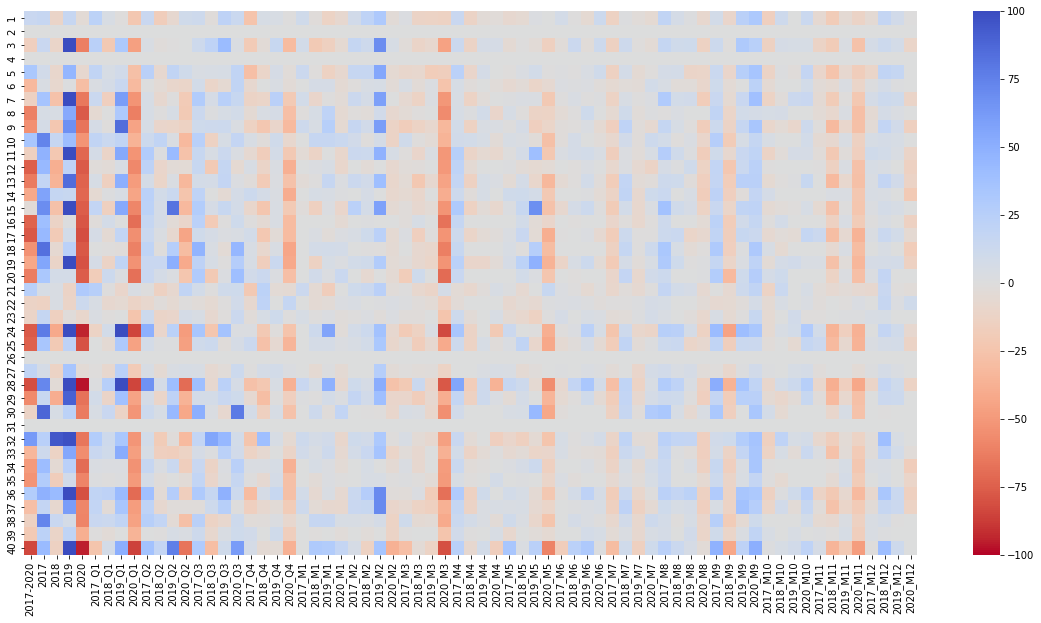

In [6]:
# Company backtests returns
fig = plt.figure(figsize=(20, 10))
y_axis_labels = [i for i in range(1, 41)]
r = sns.heatmap(
	backtests_returns[backtests_returns['ticker'] == company_ticker].drop(['ticker', 'backtest_id'], 
	axis='columns'),
	cmap='coolwarm_r',
	yticklabels=y_axis_labels,
	vmin=-100, 
	vmax=100
)

backtests_returns[backtests_returns['ticker'] == company_ticker].drop(['ticker', 'backtest_id'], axis='columns').shape

### Calculation of Alpha in backtests

In [7]:
# Calculate Alpha
tickers = []
backtest_ids = []
backtest_returns = []
baseline_returns = []
time_periods = []
alphas = []

# New DF to store alpha
alpha_df = pd.DataFrame()
alpha_df['ticker'] = []
alpha_df['backtest_id'] = []
alpha_df['backtest_return'] = []
alpha_df['baseline_return'] = []
alpha_df['time_period'] = []
alpha_df['alpha'] = []

for ticker in companies_returns['ticker']:
	# print(ticker)
	company_baseline = companies_returns[companies_returns['ticker'] == ticker]
	# print(company_baseline)
	index = list(company_baseline.index)[0]
	company_backtests = backtests_returns[backtests_returns['ticker'] == ticker]
	# print(company_backtests)
	cols = list(company_baseline.columns)
	cols.remove('ticker')
	# print(cols)
	# print(len(cols))
	for col in cols:
		for backtest in range(len(company_backtests)):
			# print(company_baseline[col][index])
			# print(list(company_backtests[col])[backtest])
			if (list(company_backtests[col])[backtest] > 0) and (list(company_backtests[col])[backtest] > company_baseline[col][index]):
				# print(f"Alpha of {round(list(company_backtests[col])[backtest] - company_baseline[col][index], 2)} found for {ticker} {col} {list(company_backtests['backtest_id'])[backtest]} with backtest return {list(company_backtests[col])[backtest]} and company baseline of {company_baseline[col][index]}")
				tickers.append(ticker)
				backtest_returns.append(round(list(company_backtests[col])[backtest], 2))
				baseline_returns.append(company_baseline[col][index])
				backtest_ids.append(list(company_backtests['backtest_id'])[backtest])
				time_periods.append(col)
				alphas.append(round(list(company_backtests[col])[backtest] - company_baseline[col][index], 2))
			# print(col, backtest)
	# break

alpha_df['ticker'] = tickers
alpha_df['backtest_id'] = backtest_ids
alpha_df['backtest_return'] = backtest_returns
alpha_df['baseline_return'] = baseline_returns
alpha_df['time_period'] = time_periods
alpha_df['alpha'] = alphas

alpha_df


,ticker,backtest_id,backtest_return,baseline_return,time_period,alpha
0,ADANIPORTS.NS,10,74.11,45.96,2017,28.15
1,ADANIPORTS.NS,11,47.90,45.96,2017,1.94
2,ADANIPORTS.NS,14,57.31,45.96,2017,11.35
3,ADANIPORTS.NS,15,68.75,45.96,2017,22.79
4,ADANIPORTS.NS,18,83.45,45.96,2017,37.49
...,...,...,...,...,...,...
46709,WIPRO.NS,1990,11.30,3.81,2019_M12,7.49
46710,WIPRO.NS,1995,8.04,3.81,2019_M12,4.23
46711,WIPRO.NS,1963,18.33,7.62,2020_M12,10.71
46712,WIPRO.NS,1986,15.31,7.62,2020_M12,7.69


### 

### Put calculated alphas in a csv

In [8]:
alpha_df.to_csv("./ALPHAS.csv", index=False)
